# Analisis exploratorio

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore') # Para evitar los molestos avisos.
%matplotlib inline

In [36]:
df = pd.read_csv('ml_project1_data.csv', sep=',')
df=df.fillna(0)
df['Education']=df['Education'].replace('2n Cycle','2n_Cycle')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [38]:
df['current_year']= 2021
df['age']=(df['current_year'].astype(int))-(df['Year_Birth'].astype(int))
df2=df.drop(['ID','Year_Birth','current_year','Dt_Customer'], axis=1)
df2.head()            

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,0,0,0,0,0,0,3,11,1,64
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,0,0,3,11,0,67
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,0,0,3,11,0,56
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,0,0,3,11,0,37
4,PhD,Married,58293.0,1,0,94,173,43,118,46,...,0,0,0,0,0,0,3,11,0,40


In [39]:
df3=pd.get_dummies(df2,columns=['Education','Marital_Status'])
df3

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,0,0,1,0,0,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,0,0,1,0,0,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,0,0,0,0,0,0,1,0,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,0,0,0,0,0,0,1,0,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,0,0,0,1,0,0,0,0
2236,64014.0,2,1,56,406,0,30,0,0,8,...,0,1,0,0,0,0,0,1,0,0
2237,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,0,0,1,0,0,0,0,0
2238,69245.0,0,1,8,428,30,214,80,30,61,...,1,0,0,0,0,0,0,1,0,0


In [40]:
print('Cantidad de Filas y columnas:',df3.shape)
print('Nombre columnas:',df3.columns)
df3.dtypes

Cantidad de Filas y columnas: (2240, 38)
Nombre columnas: Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'age', 'Education_2n_Cycle', 'Education_Basic', 'Education_Graduation',
       'Education_Master', 'Education_PhD', 'Marital_Status_Absurd',
       'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Marital_Status_YOLO'],
      dtype='object')


Income                     float64
Kidhome                      int64
Teenhome                     int64
Recency                      int64
MntWines                     int64
MntFruits                    int64
MntMeatProducts              int64
MntFishProducts              int64
MntSweetProducts             int64
MntGoldProds                 int64
NumDealsPurchases            int64
NumWebPurchases              int64
NumCatalogPurchases          int64
NumStorePurchases            int64
NumWebVisitsMonth            int64
AcceptedCmp3                 int64
AcceptedCmp4                 int64
AcceptedCmp5                 int64
AcceptedCmp1                 int64
AcceptedCmp2                 int64
Complain                     int64
Z_CostContact                int64
Z_Revenue                    int64
Response                     int64
age                          int32
Education_2n_Cycle           uint8
Education_Basic              uint8
Education_Graduation         uint8
Education_Master    

In [41]:
categoricas = []
for i in df3.columns:
    t = str(df3[i].dtype)
    n = str(df3[i].name)
    if "object" in t :
        categoricas.append(i)
categoricas

[]

In [42]:
numericas = []
for i in df3.columns:
   t = str(df3[i].dtype)
   r = str(df3[i].name)
   if ("int" in t or "float" in t) :
            numericas.append(i)
numericas


['Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response',
 'age',
 'Education_2n_Cycle',
 'Education_Basic',
 'Education_Graduation',
 'Education_Master',
 'Education_PhD',
 'Marital_Status_Absurd',
 'Marital_Status_Alone',
 'Marital_Status_Divorced',
 'Marital_Status_Married',
 'Marital_Status_Single',
 'Marital_Status_Together',
 'Marital_Status_Widow',
 'Marital_Status_YOLO']

In [43]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,2240.0,51687.459375,25609.342730,0.0,34722.00,51075.0,68289.75,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0
MntSweetProducts,2240.0,27.062946,41.280498,0.0,1.00,8.0,33.00,263.0
MntGoldProds,2240.0,44.021875,52.167439,0.0,9.00,24.0,56.00,362.0


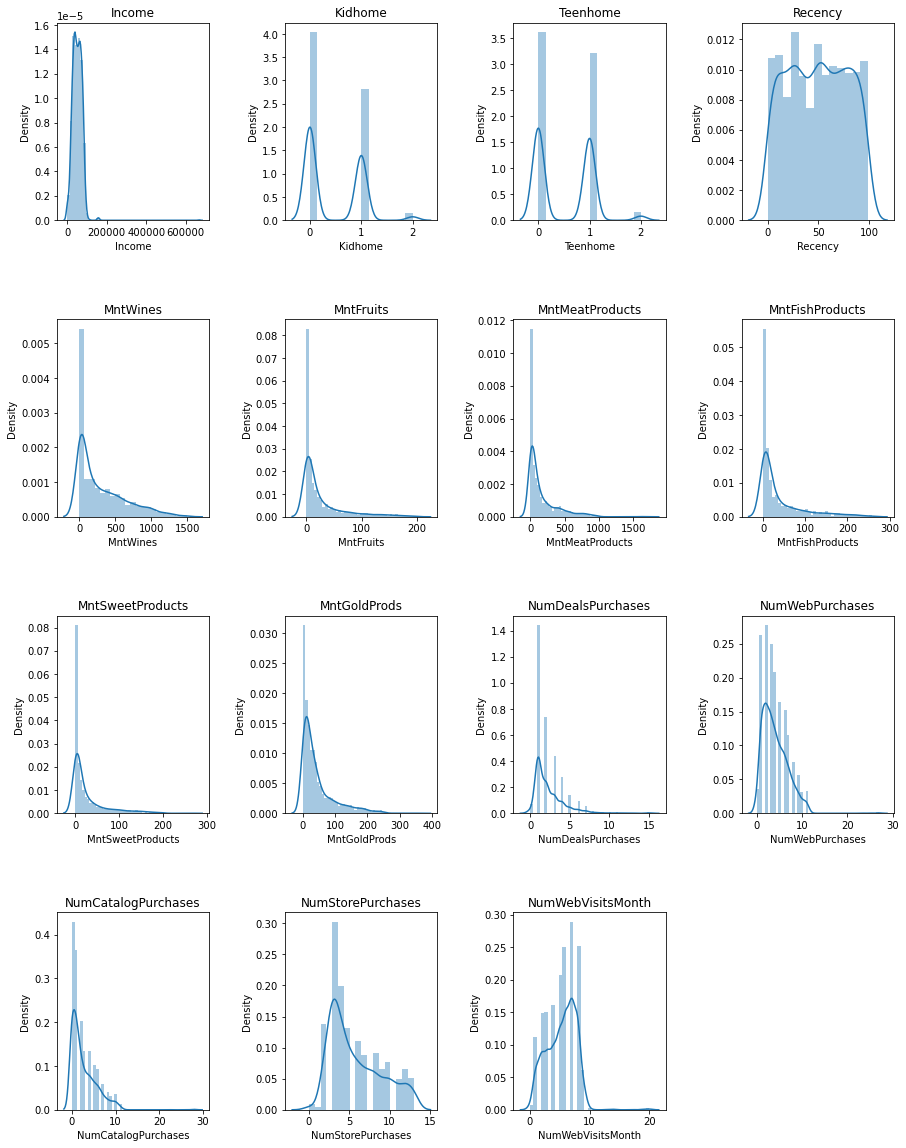

In [44]:
filas = (len(df.columns) / 8)+1
plt.figure(figsize=(15,20))
for i,j  in enumerate(numericas[:15]):
    plt.subplot(filas,4,i+1)
    plt.title(str(j))
    sns.distplot(df[j]);   

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.5);

In [46]:
filas1 = 1
plt.figure(figsize=(15,5))
for x,z in enumerate(categoricas):
    if z!='Marital_Status':
        plt.subplot(filas1,3,x+1)
        plt.title(str(z))
        sns.countplot(df[z]);

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.8);

<Figure size 1080x360 with 0 Axes>

In [47]:
df3['Income'].describe()

count      2240.000000
mean      51687.459375
std       25609.342730
min           0.000000
25%       34722.000000
50%       51075.000000
75%       68289.750000
max      666666.000000
Name: Income, dtype: float64

In [48]:
Si_compraron=df3[df3['Response'] == 1]
No_compraron=df3[df3['Response'] == 0]


In [49]:
Ingreso_Si_compraron= Si_compraron[['Income']].mean()
Ingreso_No_compraron= No_compraron[['Income']].mean()
print("el ingreso promedio de las personas que SI compraron es :", Ingreso_Si_compraron)
print("el ingreso promedio de las personas que NO compraron es :", Ingreso_No_compraron)

el ingreso promedio de las personas que SI compraron es : Income    60029.407186
dtype: float64
el ingreso promedio de las personas que NO compraron es : Income    50225.649003
dtype: float64


In [50]:
Edad_Si_compraron= Si_compraron[['age']].mean()
Edad_No_compraron= No_compraron[['age']].mean()
print("el Año promedio de nacimiento de las personas que SI compraron es :", Edad_Si_compraron)
print("el Año promedio de nacimiento de las personas que NO compraron es :", Edad_No_compraron)


el Año promedio de nacimiento de las personas que SI compraron es : age    51.583832
dtype: float64
el Año promedio de nacimiento de las personas que NO compraron es : age    52.301154
dtype: float64


### ingreso promedio personas que si compraron

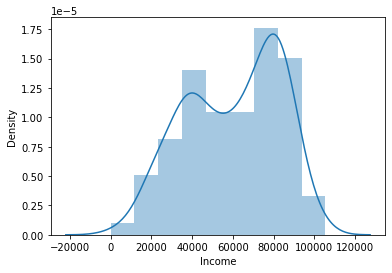

In [51]:
sns.distplot(df3[df3['Response'] == 1]['Income']);

### ingreso promedio personas que no compraron

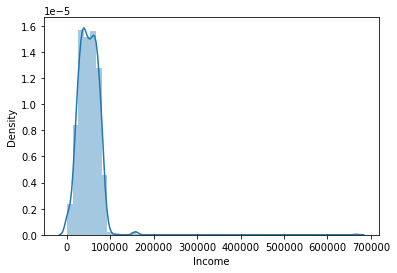

In [52]:
sns.distplot(df3[df3['Response'] == 0]['Income']);

In [53]:
data=df3
train, test = train_test_split(data, test_size=0.3)

In [54]:
print('all:  ', len(data))
print('train:', len(train))
print('test: ', len(test))

all:   2240
train: 1568
test:  672


In [55]:
target_column = 'Response'
df_train = train
labels_train = train.pop(target_column)

df_test = test
labels_test = test.pop(target_column)

In [56]:
# model1 = KNeighborsClassifier()

In [57]:
# model1.fit(df_train,labels_train)

In [58]:
# model1.score(df_test,labels_test)

In [59]:
model2 = RandomForestClassifier()

In [60]:
model2.fit(df_train,labels_train)

RandomForestClassifier()

In [61]:
y_pred=model2.predict(df_test)


In [62]:
from sklearn.metrics import accuracy_score
score=accuracy_score(labels_test,y_pred)
score

0.8943452380952381

#### al probar los dos modelos ejecutados decidimos implementar el RandomForest ya que su escor es mejor que el del KNeighbors

In [63]:
import pickle
pickle_out=open("model2.pkl","wb")
pickle.dump(model2,pickle_out)
pickle_out.close()

In [64]:
df_test.head()
df_test.to_excel("test.xlsx") 

##### a continuacion encontraran varios registros con los que podra realizar la prueba del endpoint.

 {
   "Income": 40590,
   "Kidhome": 1,
   "Teenhome": 1,
   "Recency": 30,
   "MntWines": 154,
   "MntFruits": 0,
   "MntMeatProducts": 50,
   "MntFishProducts": 6,
   "MntSweetProducts": 11,
   "MntGoldProds": 37,
   "NumDealsPurchases": 5,
   "NumWebPurchases": 3,
   "NumCatalogPurchases": 4,
   "NumStorePurchases": 3,
   "NumWebVisitsMonth": 6,
   "AcceptedCmp3": 1,
   "AcceptedCmp4": 0,
   "AcceptedCmp5": 0,
   "AcceptedCmp1": 0,
   "AcceptedCmp2": 0,
   "Complain": 0,
   "Z_CostContact": 3,
   "Z_Revenue": 11,
   "age": 52,
   "Education_2n_Cycle": 0,
   "Education_Basic": 0,
   "Education_Graduation": 1,
   "Education_Master": 0,
   "Education_PhD": 0,
   "Marital_Status_Absurd": 0,
   "Marital_Status_Alone": 0,
   "Marital_Status_Divorced": 0,
   "Marital_Status_Married": 0,
   "Marital_Status_Single": 0,
   "Marital_Status_Together": 0,
   "Marital_Status_Widow": 1,
   "Marital_Status_YOLO": 0
 }

{
   "Income": 39665,
   "Kidhome": 1,
   "Teenhome": 0,
   "Recency": 97,
   "MntWines": 127,
   "MntFruits": 1,
   "MntMeatProducts": 56,
   "MntFishProducts": 0,
   "MntSweetProducts": 1,
   "MntGoldProds": 31,
   "NumDealsPurchases": 3,
   "NumWebPurchases": 4,
   "NumCatalogPurchases": 2,
   "NumStorePurchases": 3,
   "NumWebVisitsMonth": 7,
   "AcceptedCmp3": 1,
   "AcceptedCmp4": 0,
   "AcceptedCmp5": 0,
   "AcceptedCmp1": 0,
   "AcceptedCmp2": 0,
   "Complain": 0,
   "Z_CostContact": 3,
   "Z_Revenue": 11,
   "age": 40,
   "Education_2n_Cycle": 0,
   "Education_Basic": 0,
   "Education_Graduation": 0,
   "Education_Master": 0,
   "Education_PhD": 1,
   "Marital_Status_Absurd": 0,
   "Marital_Status_Alone": 0,
   "Marital_Status_Divorced": 0,
   "Marital_Status_Married": 0,
   "Marital_Status_Single": 0,
   "Marital_Status_Together": 1,
   "Marital_Status_Widow": 0,
   "Marital_Status_YOLO": 0
    }

{
   "Income": 91700,
   "Kidhome": 0,
   "Teenhome": 0,
   "Recency": 58,
   "MntWines": 576,
   "MntFruits": 172,
   "MntMeatProducts": 961,
   "MntFishProducts": 125,
   "MntSweetProducts": 115,
   "MntGoldProds": 19,
   "NumDealsPurchases": 1,
   "NumWebPurchases": 8,
   "NumCatalogPurchases": 6,
   "NumStorePurchases": 5,
   "NumWebVisitsMonth": 3,
   "AcceptedCmp3": 0,
   "AcceptedCmp4": 0,
   "AcceptedCmp5": 0,
   "AcceptedCmp1": 0,
   "AcceptedCmp2": 0,
   "Complain": 0,
   "Z_CostContact": 3,
   "Z_Revenue": 11,
   "age": 50,
   "Education_2n_Cycle": 0,
   "Education_Basic": 0,
   "Education_Graduation": 1,
   "Education_Master": 0,
   "Education_PhD": 0,
   "Marital_Status_Absurd": 0,
   "Marital_Status_Alone": 0,
   "Marital_Status_Divorced": 0,
   "Marital_Status_Married": 0,
   "Marital_Status_Single": 1,
   "Marital_Status_Together": 0,
   "Marital_Status_Widow": 0,
   "Marital_Status_YOLO": 0
 }